# Instrucciones

- Comprima todos los archivos en un archivo `DNI.zip`
- No olvide entregar todo el código necesario para replicar sus resultados:
   + matlab: debe entregar tanto las funciones como los scripts.
   + python: es suficiente con entregar uno o varios cuadernos jupyter, pero puede entregar archivos `py` y comentarios por separado.
- No olvide responder a las preguntas planteadas. Formas aceptadas:
   + cuaderno jupyter
   + documento office
- Es imprescincible entregar los siguientes documentos:
   + Un archivo pdf con una foto de un documento manuscrito donde se declare la intención de presentarse al examen, 
   + Un archivo de audio, en formato mp3 ó ogg (consulte si por algún motivo técnico necesita enviar un fichero en otro formato)
- El resto de preguntas son solo de práctica y son totalmente opcionales. No cubren todo el temario ni tienen el nivel de dificultad requerido. Si las resuelve, recibirá feedback de parte de los profesores.

## EDOs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.linalg as la
import scipy.integrate as integ
from scipy.optimize import root, bisect
from scipy.interpolate import lagrange, CubicSpline


In [2]:
def euler(f, y0, t0, tf, N):
    '''Resuelve y=f(t,y) mediante el método de Euler
    
    INPUTS:
     - f: función de t, y
     - y0: valor inicial (se espera un array)
     - t0, tf: intervalo de integración
     - N: número de subdivisiones del intervalo de integración
          (el paso h es (tf-t0)/N)
    '''
    h = (tf - t0)/N
    ts = np.linspace(t0, tf, N+1)
    tj = 0
    #admitimos que el argumento y0 sea "list", pero lo convertimos a array
    yj = np.array(y0)
    d = yj.shape[0]
    ys = np.zeros((d,N+1))
    for j in range(N+1):
        ys[:,j] = yj
        yj = yj + h*f(tj, yj)
        tj = tj + h
    return ts, ys

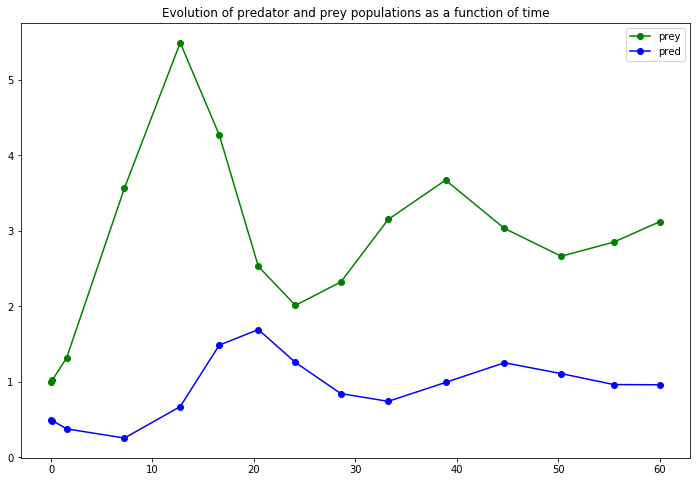

In [3]:
a, b, c, d = .3, .2, .2, .1
K = 10
fishing = .1

def LV(t,ys):
    prey, pred = ys
    return np.array([
    a*prey*(1 - prey/K) - b*pred*prey, #rate of change of prey
    -pred*(c - d*prey) - fishing*pred#rate of change of predator
    ])

t0,tf = t_span = [0,60]
y0 = [1,0.5]

sol = integ.solve_ivp(
LV, t_span, y0,
method='RK45'
)
plt.figure(figsize=(12,8))
plt.plot(sol['t'], sol['y'][0,:], 'o-g', label='prey')
plt.plot(sol['t'], sol['y'][1,:], 'o-b', label='pred')
plt.title('Evolution of predator and prey populations as a function of time')
plt.legend()

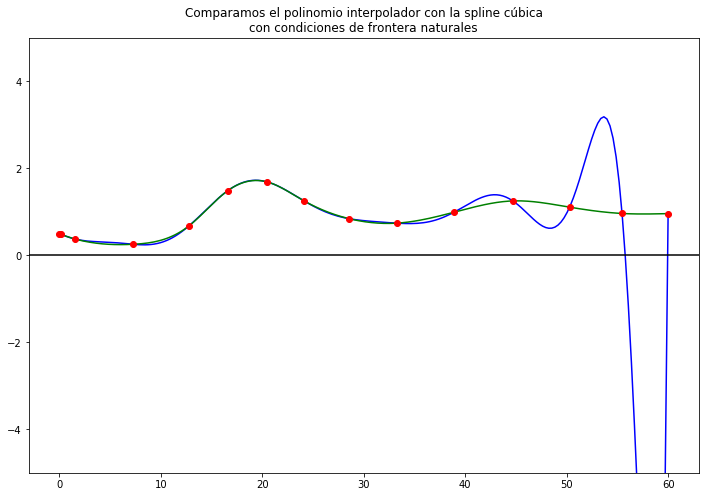

In [4]:
sol = integ.solve_ivp(
LV, t_span, y0,
method='RK45',
)
ts = sol['t']
prey = sol['y'][0,:]
pred = sol['y'][1,:]
T = ts[-1]
l = lagrange(ts, pred)
cs = CubicSpline(ts, pred, bc_type='natural')
fig, ax = plt.subplots(figsize=(12,8))
xs = np.linspace(0,T,200)
14
ys1 = l(xs)
ys2 = cs(xs)
ax.plot(xs, ys1, 'b')
ax.plot(xs, ys2, 'g')
ax.plot(ts, pred, 'or')
ax.axhline(c='k')
ax.set_ybound(-5,5)
ax.set_title('Comparamos el polinomio interpolador con la spline cúbica\n'
'con condiciones de frontera naturales')
plt.show()

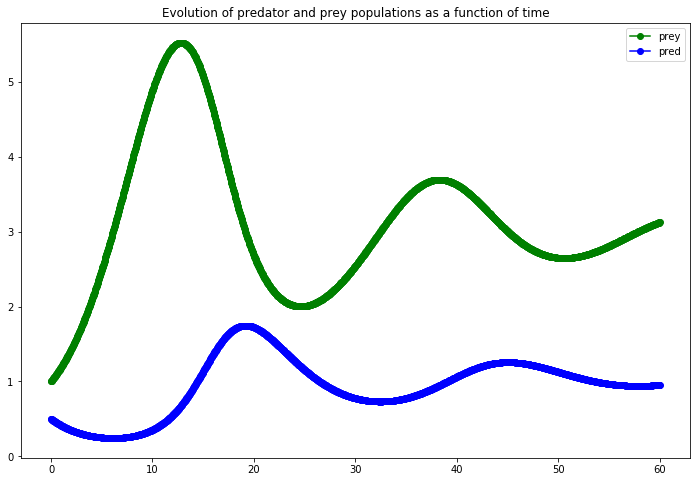

In [5]:
N = 2000
ts, ys = euler(LV, y0, t0, tf, N)

plt.figure(figsize=(12,8))
plt.plot(ts, ys[0,:], 'o-g', label='prey')
plt.plot(ts, ys[1,:], 'o-b', label='pred')
plt.title('Evolution of predator and prey populations as a function of time')
plt.legend()


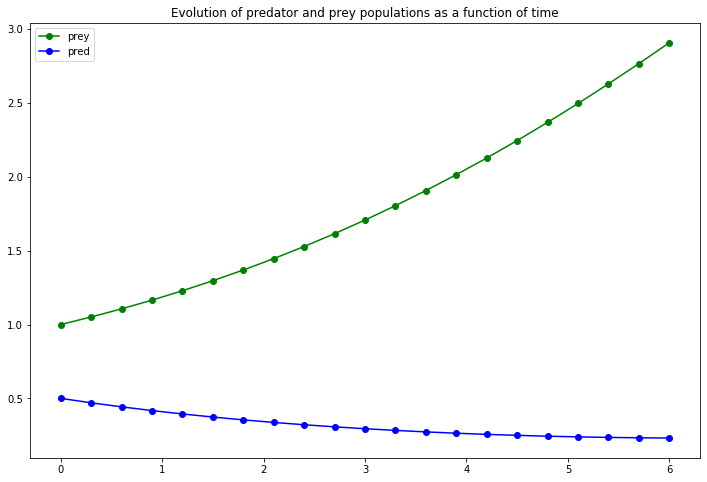

In [6]:
N = 20
t0,tf = t_span = [0,6]
ts, ys = euler(LV, y0, t0, tf, N)

plt.figure(figsize=(12,8))
plt.plot(ts, ys[0,:], 'o-g', label='prey')
plt.plot(ts, ys[1,:], 'o-b', label='pred')
plt.title('Evolution of predator and prey populations as a function of time')
plt.legend()


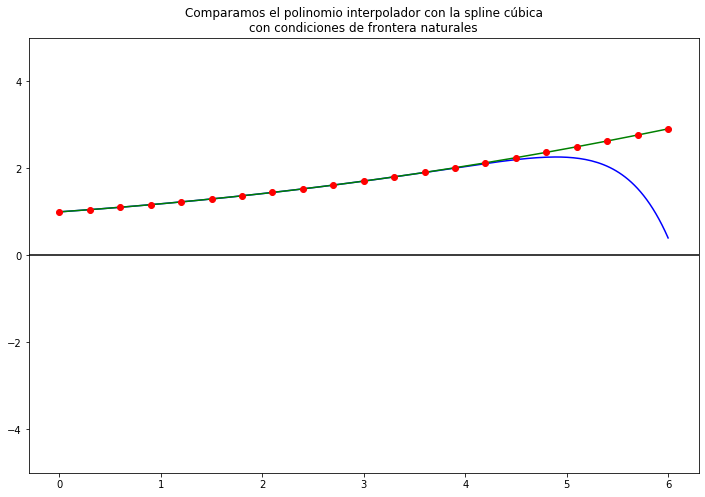

In [7]:
ts, ys = euler(LV, y0, t0, tf, N)
prey = ys[0,:]
pred = ys[1,:]
T = ts[-1]
l = lagrange(ts, prey)
cs = CubicSpline(ts, prey, bc_type='natural')
fig, ax = plt.subplots(figsize=(12,8))
xs = np.linspace(0,T,200)

ys1 = l(xs)
ys2 = cs(xs)
ax.plot(xs, ys1, 'b', label='lagrange polynomial')
ax.plot(xs, ys2, 'g', label='cubic spline')
ax.plot(ts, prey, 'or')
ax.axhline(c='k')
ax.set_ybound(-5,5)
ax.set_title('Comparamos el polinomio interpolador con la spline cúbica\n'
'con condiciones de frontera naturales')
plt.show()

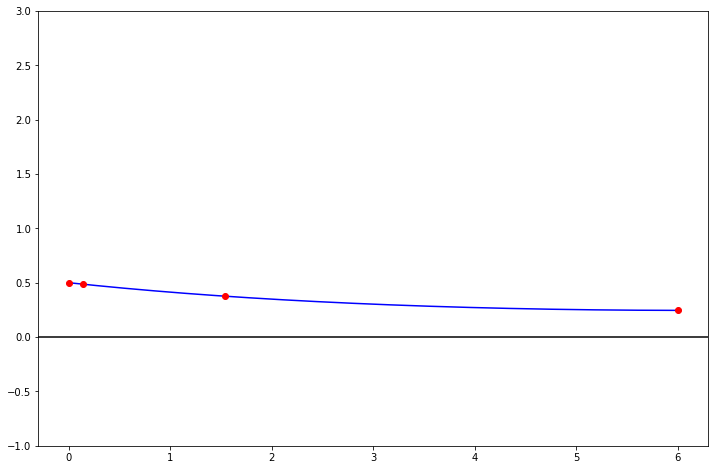

In [8]:
sol = integ.solve_ivp(
    LV, t_span, y0,
    method='RK45',
)
ts200 = np.linspace(t0, tf, 200)
sol2 = integ.solve_ivp(
    LV, t_span, y0,
    method='RK45',
    t_eval=ts200
)
ts = sol['t']
prey = sol['y'][0,:]
pred = sol['y'][1,:]
T = ts[-1]
cs = CubicSpline(ts, pred, bc_type='natural')
fig, ax = plt.subplots(figsize=(12,8))
ys1 = sol2['y'][1,:]
ax.plot(ts200, ys1, 'b')
ax.plot(ts, pred, 'or')
ax.axhline(c='k')
ax.set_ybound(-1,3)
plt.show()


In [9]:
p = fishing*integ.simps(sol2['y'][0,:], sol2['t'])
p

1.0888548236104625

In [10]:
def loss(fishing):
    def LV(t,ys):
        prey, pred = ys
        return np.array([
        a*prey*(1 - prey/K) - b*pred*prey, #rate of change of prey
        -pred*(c - d*prey) - fishing*pred#rate of change of predator
        ])

    sol2 = integ.solve_ivp(
        LV, t_span, y0,
        method='RK45',
        t_eval=ts200
    )
    income = fishing*integ.simps(sol2['y'][1,:], sol2['t'])
    spent  = .5*fishing*(tf-t0)
    return -(income-spent)

loss(0.001)

0.00045854897015708794

In [11]:
from scipy.optimize import minimize
minimize(loss, 0.001, tol=1e-4)

      fun: -0.006801460118107866
 hess_inv: array([[0.06032834]])
      jac: array([-4.17605042e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.02934918])

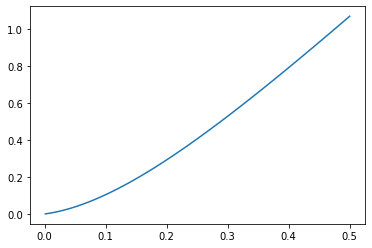

In [12]:
xs = np.linspace(0.001, 0.5, 50)
ys = np.array([loss(phi) for phi in xs])
plt.plot(xs, ys)

## Integrales dobles

Comparamos varias reglas de cuadratura para aproximar integrales de funciones sobre triángulos, y evaluamos el grado de exactitud y el orden de convergencia.

**Atención**: el grado de exactitud de la regla de orden 3 me da bien, pero el orden de convergencia no me sale 3...

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
import numpy.linalg as la

In [113]:
vertices = np.array([
    [0,0], [1,0], [0,1]
])

lower = lambda x:0
def upper(x):
    return 1-x

vertices

array([[0, 0],
       [1, 0],
       [0, 1]])

In [114]:
def f(coords):
    x,y = coords
    return x**2 * y**2

def dbl_quad_integrand(f):
    f_dq = lambda y,x: f([x,y])
    return f_dq

integ.dblquad(dbl_quad_integrand(f), 0, 1, lower, upper, epsrel=1e-10)

(0.005555555555555556, 1.2704101456628346e-16)

In [115]:
def regla1(f, vs):
    P = np.ones((3,3))
    P[:,:2] =vs[:,:]
    area = np.abs(la.det(P)/2)
#    print(area)
#    print(vs)
    v1 = vs[0]
    v2 = vs[1]
    v3 = vs[2]
    integral = (area/3)*(f(v1) + f(v2) + f(v3))
    return integral

def regla2(f, vs):
    P = np.ones((3,3))
    P[:,:2] =vs[:,:]
    area = np.abs(la.det(P)/2)
    v1 = vs[0]
    v2 = vs[1]
    v3 = vs[2]
    midpoint12 = (v1+v2)/2
    midpoint23 = (v2+v3)/2
    midpoint31 = (v3+v1)/2
    integral = (area/3)*(f(midpoint12) + f(midpoint23) + f(midpoint31))
    return integral

def regla3(f, vs):
    P = np.ones((3,3))
    P[:,:2] =vs[:,:]
    area = np.abs(la.det(P)/2)
    v1 = vs[0]
    v2 = vs[1]
    v3 = vs[2]
    midpoint12 = (v1+v2)/2
    midpoint23 = (v2+v3)/2
    midpoint31 = (v3+v1)/2
    barycenter = (v1+v2+v3)/3
    integral = (area/60)*(
        27*f(barycenter) 
        + 8*(f(midpoint12) + f(midpoint23) + f(midpoint31)) 
        + 3*(f(v1) + f(v2) + f(v3))
    )
    return integral

In [116]:
regla1(f,vertices), regla2(f,vertices)

(0.0, 0.010416666666666666)

In [117]:
nmax = 40
f = lambda xs:xs[0]**2 * xs[1]**2
f = lambda xs:np.sin(7*xs[0] + 5*xs[1])
f = lambda xs:np.exp(xs[0])
errores1, errores2, errores3 = np.zeros(nmax-2), np.zeros(nmax-2), np.zeros(nmax-2)
hs = np.zeros(nmax-2)
ns = np.arange(2,nmax)
for j in range(nmax -2):
    n = ns[j]
    h = 1/n
    exacta = h**6/180
    exacta = h - np.sin(h)
    exacta = -h + np.exp(h) - 1
    hs[j] = h
    vertices = np.array([
        [0,0], [h,0], [0,h]
    ])
    errores1[j] = np.abs( regla1(f,vertices) - exacta)
    errores2[j] = np.abs( regla2(f,vertices) - exacta)
    errores3[j] = np.abs( regla3(f,vertices) - exacta)


0 [-4.05491163 -2.98361096]
1 [-5.04370714 -6.42433254]
2 [-6.05300787 -8.87669386]


Text(0.5, 1.0, 'la pendiente del método 3 debería ser más acusada que la del método 2')

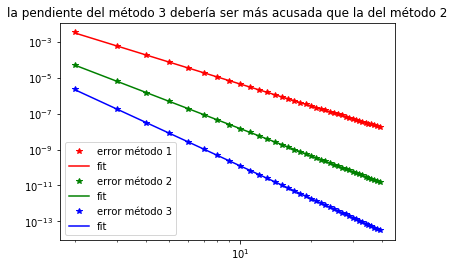

In [118]:
colores = 'rgbkycm'
for j,errores in enumerate( (errores1, errores2, errores3)):
    plt.loglog(ns, errores, '*%s'%colores[j],label='error método %d'%(j+1))
    p = np.polyfit(np.log(ns),np.log(errores),1)
    print(j, p)
    plt.plot(ns, np.exp(np.polyval(p, np.log(ns))), '-%s'%colores[j], label='fit')
plt.legend()
plt.title('la pendiente del método 3 debería ser más acusada que la del método 2')


In [119]:
vertices = np.array([
    [0,0], [1,0], [0,1]
])

fs = [
    lambda xs:1,
    lambda xs:xs[0],
    lambda xs:xs[1],
    lambda xs:xs[0]*xs[1],
    lambda xs:xs[0]**2,
    lambda xs:xs[0]**2+xs[1]**2,
    lambda xs:xs[0]**2+xs[1],
    lambda xs:xs[0]*xs[1]**2,
    lambda xs:xs[0]**2*xs[1],
    lambda xs:xs[0]**3,
    lambda xs:xs[0]**2*xs[1]**2
]
for j,f in enumerate(fs):
    print('-'*20,j)
    print(integ.dblquad(dbl_quad_integrand(f), 0, 1, lower, upper))
    print(regla1(f, vertices))
    print(regla2(f, vertices))
    print(regla3(f, vertices))

-------------------- 0
(0.5, 1.1078122658246858e-14)
0.5
0.5
0.5
-------------------- 1
(0.16666666666666669, 2.7755575615628914e-15)
0.16666666666666666
0.16666666666666666
0.16666666666666666
-------------------- 2
(0.16666666666666669, 5.5270337089522116e-15)
0.16666666666666666
0.16666666666666666
0.16666666666666666
-------------------- 3
(0.04166666666666667, 8.203240256944732e-16)
0.0
0.041666666666666664
0.041666666666666664
-------------------- 4
(0.08333333333333334, 1.6406480513889463e-15)
0.16666666666666666
0.08333333333333333
0.08333333333333333
-------------------- 5
(0.16666666666666666, 3.6767403711787844e-15)
0.3333333333333333
0.16666666666666666
0.16666666666666666
-------------------- 6
(0.25, 5.527085942945804e-15)
0.3333333333333333
0.25
0.25
-------------------- 7
(0.016666666666666666, 3.8598123827243873e-16)
0.0
0.020833333333333332
0.016666666666666666
-------------------- 8
(0.016666666666666666, 3.469446951953614e-16)
0.0
0.020833333333333332
0.016666666666

In [120]:
def regla1_compuesta(f, vertices, n):
    v0 = vertices[0]
    v1 = vertices[1]
    v2 = vertices[2]
    an = np.linspace(0,1,n)
    bn = np.linspace(0,1,n)
    integral = 0
    for i in range(n-1):
        for j in range(n-1-i):
            #coordenadas baricéntricas del primer vértice
            a = an[i]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del primer vértice del subtriángulo
            vt0 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del segundo vértice
            a = an[i+1]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del segundo vértice del subtriángulo
            vt1 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del tercer vértice
            a = an[i]
            b = bn[j+1]
            c = 1 - a - b
            #coordenadas del tercer vértice del subtriángulo
            vt2 = a*v0 + b*v1 + c*v2
            vertices_t = np.array([vt0, vt1, vt2])
            integral += regla1(f, vertices_t)
            if i+j<n-2:
                #coordenadas baricéntricas del primer vértice
                a = an[i+1]
                b = bn[j+1]
                c = 1 - a - b
                #coordenadas del primer vértice del subtriángulo
                vt0 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del segundo vértice
                a = an[i+1]
                b = bn[j]
                c = 1 - a - b
                #coordenadas del segundo vértice del subtriángulo
                vt1 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del tercer vértice
                a = an[i]
                b = bn[j+1]
                c = 1 - a - b
                #coordenadas del tercer vértice del subtriángulo
                vt2 = a*v0 + b*v1 + c*v2
                vertices_t = np.array([vt0, vt1, vt2])
                integral += regla1(f, vertices_t)

    return integral

def regla_compuesta(f, vertices, n, regla=regla1):
    v0 = vertices[0]
    v1 = vertices[1]
    v2 = vertices[2]
    an = np.linspace(0,1,n+1)
    bn = np.linspace(0,1,n+1)
    integral = 0
    for i in range(n):
        for j in range(n-i):
            #coordenadas baricéntricas del primer vértice
            a = an[i]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del primer vértice del subtriángulo
            vt0 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del segundo vértice
            a = an[i+1]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del segundo vértice del subtriángulo
            vt1 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del tercer vértice
            a = an[i]
            b = bn[j+1]
            c = 1 - a - b
            #coordenadas del tercer vértice del subtriángulo
            vt2 = a*v0 + b*v1 + c*v2
            vertices_t = np.array([vt0, vt1, vt2])
            integral += regla(f, vertices_t)
            if i+j<n-1:
                #coordenadas baricéntricas del primer vértice
                a = an[i+1]
                b = bn[j+1]
                c = 1 - a - b
                #coordenadas del primer vértice del subtriángulo
                vt0 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del segundo vértice
                a = an[i+1]
                b = bn[j]
                c = 1 - a - b
                #coordenadas del segundo vértice del subtriángulo
                vt1 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del tercer vértice
                a = an[i]
                b = bn[j+1]
                c = 1 - a - b
                #coordenadas del tercer vértice del subtriángulo
                vt2 = a*v0 + b*v1 + c*v2
                vertices_t = np.array([vt0, vt1, vt2])
                integral += regla(f, vertices_t)

    return integral


In [122]:
#HERE

DEBUG = False
f = lambda xs:xs[0]**2
print(integ.dblquad(dbl_quad_integrand(f), 0, 1, lower, upper))
print(regla1(f,vertices), regla2(f,vertices), regla3(f,vertices))
for n in range(1,4):
    print('#'*20)
    print(n)
    print(n,
          regla1_compuesta(f,vertices,n),
          regla_compuesta(f,vertices,n, regla1),
          regla_compuesta(f,vertices,n, regla2),
          regla_compuesta(f,vertices,n, regla3))

(0.08333333333333334, 1.6406480513889463e-15)
0.16666666666666666 0.08333333333333333 0.08333333333333333
####################
1
1 0 0.16666666666666666 0.08333333333333333 0.08333333333333333
####################
2
2 0.16666666666666666 0.10416666666666667 0.08333333333333333 0.08333333333333333
####################
3
3 0.10416666666666667 0.09259259259259257 0.0833333333333333 0.0833333333333333


In [123]:
DEBUG = False
f = lambda xs:xs[0]**2*xs[1]**2
print(integ.dblquad(dbl_quad_integrand(f), 0, 1, lower, upper))
print(regla1(f,vertices))
for n in range(1,20):
    print('#'*20)
    print(n)
    print(n,
          regla1_compuesta(f,vertices,n),
          regla_compuesta(f,vertices,n, regla1),
          regla_compuesta(f,vertices,n, regla2),
          regla_compuesta(f,vertices,n, regla3))

(0.005555555555555556, 1.2704101456628346e-16)
0.0
####################
1
1 0 0.0 0.010416666666666666 0.006944444444444444
####################
2
2 0.0 0.0078125 0.005859375 0.00564236111111111
####################
3
3 0.0078125 0.006858710562414265 0.00561556927297668 0.0055727023319615925
####################
4
4 0.006858710562414265 0.006347656250000001 0.005574544270833335 0.005560980902777777
####################
5
5 0.006347656250000001 0.0060799999999999995 0.005563333333333333 0.00555777777777778
####################
6
6 0.0060799999999999995 0.005926354595336078 0.005559306412894376 0.0055566272290809345
####################
7
7 0.005926354595336078 0.005830903790087465 0.005557580174927112 0.005556134018233146
####################
8
8 0.005830903790087465 0.005767822265625003 0.0055567423502604196 0.0055558946397569415
####################
9
9 0.005767822265625003 0.005724059679249437 0.005556296465647174 0.005555767244153162
####################
10
10 0.005724059679249437 0

In [128]:
nmax = 40
f = lambda xs:xs[0]**3 + xs[1]**4
#f = lambda xs:(xs[0]**3 + (xs[0]+ 1)**4 + (xs[1] + xs[0] + 1)**2 + 2)*np.exp(xs[0])
#f = lambda xs:xs[0]**2 + xs[1]**2 + (xs[0] + xs[1] + 1)
#f = lambda xs:np.sin((xs[0] + 3*xs[1])*5)
exacta, error = integ.dblquad(dbl_quad_integrand(f), 0, 1, lower, upper)
errores1, errores2, errores3 = np.zeros(nmax-2), np.zeros(nmax-2), np.zeros(nmax-2)
ns = np.arange(2,nmax)
for j in range(nmax-2):
    n = ns[j]
    errores1[j] = np.abs( regla_compuesta(f,vertices,n, regla1) - exacta)
    errores2[j] = np.abs( regla_compuesta(f,vertices,n, regla2) - exacta)
    errores3[j] = np.abs( regla_compuesta(f,vertices,n, regla3) - exacta)


In [132]:
regla1_compuesta??

Signature: regla1_compuesta(f, vertices, n)
Docstring: <no docstring>
Source:   
def regla1_compuesta(f, vertices, n):
    v0 = vertices[0]
    v1 = vertices[1]
    v2 = vertices[2]
    an = np.linspace(0,1,n)
    bn = np.linspace(0,1,n)
    integral = 0
    for i in range(n-1):
        for j in range(n-1-i):
            #coordenadas baricéntricas del primer vértice
            a = an[i]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del primer vértice del subtriángulo
            vt0 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del segundo vértice
            a = an[i+1]
            b = bn[j]
            c = 1 - a - b
            #coordenadas del segundo vértice del subtriángulo
            vt1 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del tercer vértice
            a = an[i]
            b = bn[j+1]
            c = 1 - a - b
            #coordenadas del tercer vértice del subtriángulo
            vt2 = a*v0 + b*v1 + c*v2
     

Text(0.5, 1.0, 'la pendiente del método 3 debería ser más acusada que la del método 2')

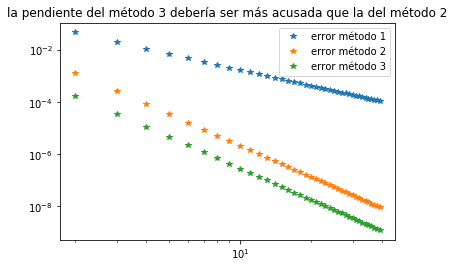

In [130]:
plt.loglog(ns, errores1, '*', label='error método 1')
plt.loglog(ns, errores2, '*',label='error método 2')
plt.loglog(ns, errores3, '*',label='error método 3')
plt.legend()
plt.title('la pendiente del método 3 debería ser más acusada que la del método 2')

0 [-2.04211929 -0.83199717]
1 [-4.89182542  0.61755063]
2 [-4.72204026  0.67336523]


Text(0.5, 1.0, 'la pendiente del método 3 debería ser más acusada que la del método 2')

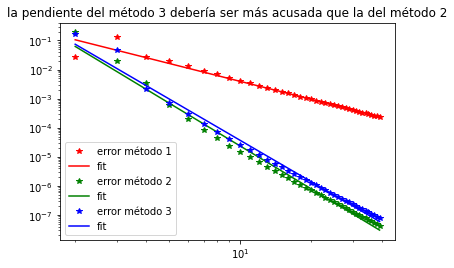

In [341]:
colores = 'rgbkycm'
for j,errores in enumerate( (errores1, errores2, errores3)):
    plt.loglog(ns, errores, '*%s'%colores[j],label='error método %d'%(j+1))
    p = np.polyfit(np.log(ns),np.log(errores),1)
    print(j, p)
    plt.plot(ns, np.exp(np.polyval(p, np.log(ns))), '-%s'%colores[j], label='fit')
plt.legend()
plt.title('la pendiente del método 3 debería ser más acusada que la del método 2')


## DEBUG

In [246]:
DEBUG = True
def plot_polygon(vertices, *args):
    barycenter = vertices.mean(axis=0).reshape((1,2))
    vertices = 0.95*vertices+0.05*barycenter
    plt.plot(list(vertices[:,0]) + [vertices[0,0]],
             list(vertices[:,1]) + [vertices[0,1]], *args)

def regla1_compuesta(f, vertices, n):
    v0 = vertices[0]
    v1 = vertices[1]
    v2 = vertices[2]
    an = np.linspace(0,1,n)
    bn = np.linspace(0,1,n)
    integral = 0
    for i in range(n-1):
        for j in range(n-1-i):
            if DEBUG: print('type 1')
            #coordenadas baricéntricas del primer vértice
            a = an[i]
            b = bn[j]
            c = 1 - a - b
            if DEBUG: print((a,b,c,))
            #coordenadas del primer vértice del subtriángulo
            vt0 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del segundo vértice
            a = an[i+1]
            b = bn[j]
            c = 1 - a - b
            if DEBUG: print((a,b,c,))
            #coordenadas del segundo vértice del subtriángulo
            vt1 = a*v0 + b*v1 + c*v2
            #coordenadas baricéntricas del tercer vértice
            a = an[i]
            b = bn[j+1]
            c = 1 - a - b
            if DEBUG: print((a,b,c,))
            #coordenadas del tercer vértice del subtriángulo
            vt2 = a*v0 + b*v1 + c*v2
            vertices_t = np.array([vt0, vt1, vt2])
            if DEBUG: print(regla1(f, vertices_t))
            if DEBUG: print(vertices_t)
            if DEBUG: plot_polygon(vertices_t, 'b-')
            integral += regla1(f, vertices_t)
            if i+j<n-2:
                if DEBUG: print('type 2')
                #coordenadas baricéntricas del primer vértice
                a = an[i+1]
                b = bn[j+1]
                c = 1 - a - b
                if DEBUG: print((a,b,c,))
                #coordenadas del primer vértice del subtriángulo
                vt0 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del segundo vértice
                a = an[i+1]
                b = bn[j]
                c = 1 - a - b
                if DEBUG: print((a,b,c,))
                #coordenadas del segundo vértice del subtriángulo
                vt1 = a*v0 + b*v1 + c*v2
                #coordenadas baricéntricas del tercer vértice
                a = an[i]
                b = bn[j+1]
                c = 1 - a - b
                if DEBUG: print((a,b,c,))
                #coordenadas del tercer vértice del subtriángulo
                vt2 = a*v0 + b*v1 + c*v2
                vertices_t = np.array([vt0, vt1, vt2])
                if DEBUG: print(vertices_t)
                if DEBUG: plot_polygon(vertices_t, 'g:')
                if DEBUG: print(regla1(f, vertices_t))
                integral += regla1(f, vertices_t)

    return integral


In [ ]:
DEBUG = True
f = lambda xs:xs[0]**2*xs[1]**2
print(integ.dblquad(dbl_quad_integrand(f), 0, 1, g, h))
print(regla1(f,vertices))
for n in range(1,20):
    print('#'*20)
    print(n)
    print(n,regla1_compuesta(f,vertices,n),regla_compuesta(f,vertices,n, regla2),regla_compuesta(f,vertices,n, regla3))

(0.5, 1.1078122658246858e-14)
0.5
####################
: 1 0
####################
type 1
(0.0, 0.0, 1.0)
(1.0, 0.0, 0.0)
(0.0, 1.0, 0.0)
0.5
[[0. 0.]
 [1. 0.]
 [0. 1.]]
: 2 0.5
####################
type 1
(0.0, 0.0, 1.0)
(0.5, 0.0, 0.5)
(0.0, 0.5, 0.5)
0.0625
[[0.  0. ]
 [0.5 0. ]
 [0.  0.5]]
type 2
(0.5, 0.5, 0.0)
(0.5, 0.0, 0.5)
(0.0, 0.5, 0.5)
[[0.5 0.5]
 [0.5 0. ]
 [0.  0.5]]
0.125
type 1
(0.0, 0.5, 0.5)
(0.5, 0.5, 0.0)
(0.0, 1.0, 0.0)
0.1875
[[0.  0.5]
 [0.5 0.5]
 [0.  1. ]]
type 1
(0.5, 0.0, 0.5)
(1.0, 0.0, 0.0)
(0.5, 0.5, 0.0)
0.125
[[0.5 0. ]
 [1.  0. ]
 [0.5 0.5]]
: 3 0.5
####################
type 1
(0.0, 0.0, 1.0)
(0.3333333333333333, 0.0, 0.6666666666666667)
(0.0, 0.3333333333333333, 0.6666666666666667)
0.01851851851851851
[[0.         0.        ]
 [0.33333333 0.        ]
 [0.         0.33333333]]
type 2
(0.3333333333333333, 0.3333333333333333, 0.3333333333333334)
(0.3333333333333333, 0.0, 0.6666666666666667)
(0.0, 0.3333333333333333, 0.6666666666666667)
[[0.33333333 0.33333

<Figure size 432x288 with 0 Axes>

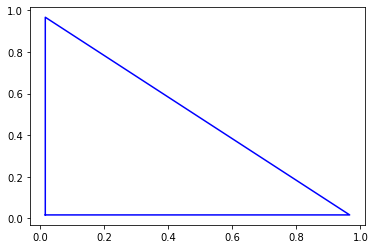

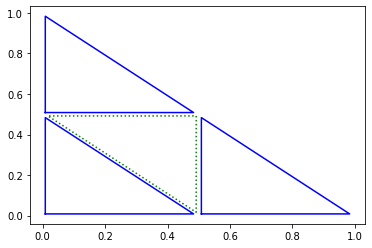

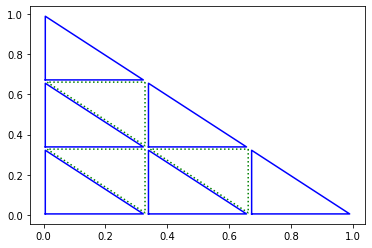

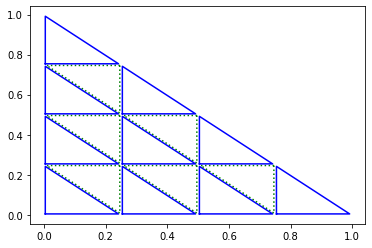

In [247]:
DEBUG = True
f = lambda xs:xs[0]**2*xs[1]**2
f = lambda xs:xs[0] + xs[1]*2
print(integ.dblquad(dbl_quad_integrand(f), 0, 1, g, h))
print(regla1(f,vertices))
for n in range(1,6):
    plt.figure()
    print('#'*20)
    print(':', n,regla1_compuesta(f,vertices,n))